In [ ]:
import pandas as _hex_pandas
import datetime as _hex_datetime
import json as _hex_json

In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

<div align="center"><b>Data Cleanup</b></div>


In [ ]:
# Create Dataframe
df = pd.read_csv("ABT_Wrangled.csv")

In [ ]:
df.head()

,pid,totalac,dateofsale,yearbuilt,heatedarea,descbuildi,bldggrade,landusecod,descproper,neighbourh,redeveloped,Land_To_Total_Val_Ratio
0,00101101,0.449827,10/30/1970 0:00,NaN,0.0,NaN,NaN,R120,NaN,LAKE NORMAN,0,1.0
1,00101102,0.796589,9/11/2015 0:00,NaN,0.0,NaN,NaN,R100,NaN,LAKE NORMAN,0,1.0
2,00101103,0.779670,6/12/1971 0:00,NaN,0.0,NaN,NaN,9100,NaN,LAKE NORMAN,0,1.0
3,00101104,0.756320,2/8/1971 0:00,NaN,0.0,NaN,NaN,9100,NaN,LAKE NORMAN,0,1.0
4,00101105,1.213385,10/30/1970 0:00,NaN,0.0,NaN,NaN,9100,NaN,LAKE NORMAN,0,1.0


In [ ]:
# Examine DF Charactestics
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 346496 entries, 0 to 346495
Data columns (total 12 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   pid                      346496 non-null  object 
 1   totalac                  346496 non-null  float64
 2   dateofsale               344248 non-null  object 
 3   yearbuilt                304809 non-null  float64
 4   heatedarea               346496 non-null  float64
 5   descbuildi               304818 non-null  object 
 6   bldggrade                303225 non-null  object 
 7   landusecod               346495 non-null  object 
 8   descproper               304777 non-null  object 
 9   neighbourh               340926 non-null  object 
 10  redeveloped              346496 non-null  int64  
 11  Land_To_Total_Val_Ratio  337011 non-null  float64
dtypes: float64(4), int64(1), object(7)
memory usage: 31.7+ MB


In [ ]:
# Missing Value Check
df.isnull().sum()

pid                            0
totalac                        0
dateofsale                  2248
yearbuilt                  41687
heatedarea                     0
descbuildi                 41678
bldggrade                  43271
landusecod                     1
descproper                 41719
neighbourh                  5570
redeveloped                    0
Land_To_Total_Val_Ratio     9485
dtype: int64

In [ ]:
#""" There is overlap between the following variables: Yearbuilt, DescBuilding, DescProper, & BldgGrade; When a property
#has not been developed/built upon it makes sense that none of these columns would have values. However this is still 
#very important, because if an area hasn't been built upon it could be more likley to develop! So we are going to bin the
#years and when all four of these categories have a null value we will replace them with a placeholder value "not built upon"""

# Bin by decades on yearbuilt column
min_year = int(df["yearbuilt"].min())
max_year = int(df["yearbuilt"].max())
bins = list(range((min_year // 10) * 10, (max_year // 10 + 2) * 10, 10))

# Create labels for the bins
labels = [f"{i}-{i + 9}" for i in range((min_year // 10) * 10, (max_year // 10 + 1) * 10, 10)]

# Apply binning to the 'yearbuilt' column
df["yearbuilt_binned"] = pd.cut(df["yearbuilt"], bins=bins, labels=labels, right=False)

# Add "not built upon" to the categories for 'yearbuilt_binned'
df["yearbuilt_binned"] = df["yearbuilt_binned"].cat.add_categories(["not built upon"])

# Function to determine if all specified columns are null for a row
columns_to_check = ["yearbuilt", "descbuildi", "bldggrade", "descproper"]
all_specified_null = df[columns_to_check].isnull().all(axis=1)

# Replace 'yearbuilt_binned' with "not built upon" where all specified columns are null
df.loc[all_specified_null, "yearbuilt_binned"] = "not built upon"

# Replace null values in each of the specified columns with "not built upon"
for column in columns_to_check:
    df.loc[all_specified_null, column] = "not built upon"

# Updated null value check
df.isnull().sum()


pid                           0
totalac                       0
dateofsale                 2248
yearbuilt                     9
heatedarea                    0
descbuildi                    0
bldggrade                  1593
landusecod                    1
descproper                   41
neighbourh                 5570
redeveloped                   0
Land_To_Total_Val_Ratio    9485
yearbuilt_binned              9
dtype: int64

In [ ]:
# Drop rows with nulls
df = df.dropna()

# Check for nulls in the dataframe
df.isnull().sum()

pid                        0
totalac                    0
dateofsale                 0
yearbuilt                  0
heatedarea                 0
descbuildi                 0
bldggrade                  0
landusecod                 0
descproper                 0
neighbourh                 0
redeveloped                0
Land_To_Total_Val_Ratio    0
yearbuilt_binned           0
dtype: int64

In [ ]:
# Calculate dayssincesale and drop the datesofsale column
from datetime import datetime
df["dateofsale"] = pd.to_datetime(df["dateofsale"], format="%m/%d/%Y %H:%M")
reference_date = datetime.now()
df["dayssincesale"] = (reference_date - df["dateofsale"]).dt.days
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 329035 entries, 0 to 346493
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   pid                      329035 non-null  object        
 1   totalac                  329035 non-null  float64       
 2   dateofsale               329035 non-null  datetime64[ns]
 3   yearbuilt                329035 non-null  object        
 4   heatedarea               329035 non-null  float64       
 5   descbuildi               329035 non-null  object        
 6   bldggrade                329035 non-null  object        
 7   landusecod               329035 non-null  object        
 8   descproper               329035 non-null  object        
 9   neighbourh               329035 non-null  object        
 10  redeveloped              329035 non-null  int64         
 11  Land_To_Total_Val_Ratio  329035 non-null  float64       
 12  yearbuilt_binned

In [ ]:
# w/ domain knowledge we decide to concetenate descprop & descbuildi 
df['desc_combined'] = df['descproper'] + "_" + df['descbuildi']
df.describe()

,totalac,heatedarea,redeveloped,Land_To_Total_Val_Ratio,dayssincesale
count,329035.000000,3.290350e+05,329035.000000,329035.000000,329035.000000
mean,0.811597,3.613915e+03,0.025927,0.365106,5767.696473
std,4.975125,2.293328e+04,0.158919,0.258336,4111.428385
min,0.000028,0.000000e+00,0.000000,0.002309,1562.000000
25%,0.180729,1.296000e+03,0.000000,0.202122,2555.000000
50%,0.274516,1.838000e+03,0.000000,0.259067,4320.000000
75%,0.450890,2.672000e+03,0.000000,0.419031,7708.000000
max,654.813014,2.737623e+06,1.000000,1.000000,45285.000000


In [ ]:
# Assuming 'df' is your DataFrame and 'redeveloped' is the column of interest
redeveloped_counts = df['redeveloped'].value_counts()
print(redeveloped_counts)


0    320504
1      8531
Name: redeveloped, dtype: int64


<div align="center"><b>Logistic Regression Model</b></div>

In [ ]:
from sklearn.utils import resample
feature_cols = [
    "totalac",
    "yearbuilt",
    "heatedarea",
    "neighbourh",
    "Land_To_Total_Val_Ratio",
    "dayssincesale",
    "desc_combined",
    "pid",
]
X = df[feature_cols]
y = df.redeveloped
X_pid = X["pid"]
zeros = df[df["redeveloped"] == 0]
ones = df[df["redeveloped"] == 1]
print(len(ones))
zeros = resample(zeros, replace=True, n_samples=50000, random_state=42)

df = pd.concat([zeros, ones])

8531


In [ ]:
zeros = df[df["redeveloped"] == 0]
ones = df[df["redeveloped"] == 1]

print(str(len(zeros)) + "\n" + str(len(ones)))

50000
8531


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.utils import resample

# Column Transformer/Preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        (
            "num",
            StandardScaler(),
            [
                "totalac",
                "yearbuilt",
                "heatedarea",
                "Land_To_Total_Val_Ratio",
                "dayssincesale",
            ],
        ),
        (
            "cat",
            OneHotEncoder(handle_unknown="ignore"),
            ["neighbourh", "desc_combined"],
        ),
    ]
)

# Split Dataset into features and target variables
feature_cols = [
    "totalac",
    "yearbuilt",
    "heatedarea",
    "neighbourh",
    "Land_To_Total_Val_Ratio",
    "dayssincesale",
    "desc_combined",
    "pid"
]
X_s = df[feature_cols]
y_s = df.redeveloped


# Split data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(
    X_s, y_s, test_size=0.3, random_state=42, stratify=y_s
)
# Upsampling occurrences of 1 in the training set
train = pd.concat([X_train, y_train], axis=1)


train_majority = train[train["redeveloped"] == 0]
train_minority = train[train["redeveloped"] == 1]
train_majority_downsampled = resample(
    train_majority, replace=False, n_samples=len(train_minority), random_state=42
)

train_downsampled = pd.concat([train_majority_downsampled, train_minority])

X_test_pid = X_test["pid"]
X_test = X_test.drop("pid", axis=1)
y_train = train_downsampled["redeveloped"]
X_train = train_downsampled.drop("redeveloped", axis=1)
X_train_pid = X_train["pid"]
X_train = X_train.drop("pid", axis=1)

feature_cols = [
    "totalac",
    "yearbuilt",
    "heatedarea",
    "neighbourh",
    "Land_To_Total_Val_Ratio",
    "dayssincesale",
    "desc_combined",
]
X = X.drop("pid", axis=1)

In [ ]:
# # Do a gridsearch to optimize hyperparmeters 
# from sklearn.model_selection import GridSearchCV

# # Define the parameter grid to search
# param_grid = {
#     'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100], # Regularization strength
#     'classifier__penalty': ['l1', 'l2'], # Norm used in the penalization
# }

# # Create a GridSearchCV object
# grid_search = GridSearchCV(logreg_pipeline, param_grid, cv=5, scoring='roc_auc', verbose=1, n_jobs=-1)

# # Fit  GridSearchCV to training data
# grid_search.fit(X_train, y_train)

# # Print the best parameters found by GridSearchCV
# print("Best parameters found: ", grid_search.best_params_)

# # Predict on the testing set using the best found parameters
# y_pred = grid_search.predict(X_test)
# y_prob = grid_search.predict_proba(X_test)[:, 1]  # probabilities for ROC-AUC

# # Evaluate the model 
# print(confusion_matrix(y_test, y_pred))
# print(classification_report(y_test, y_pred))
# print('ROC-AUC Score:', roc_auc_score(y_test, y_prob))


In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV

def NNCV(xtrain,ytrain,xtest,ytest):

    # Parameter tuning
    # NN modeling
    nn_classifier = MLPClassifier()
    parameters = {
        "hidden_layer_sizes": [
            (1,),
            (5,),
            (10,)
            
        ],
        "activation": ["identity", "logistic", "tanh", "relu"],
        "learning_rate": ["constant", "invscaling", "adaptive"],
    }
    clf = GridSearchCV(nn_classifier, parameters, n_jobs=-1, cv=2)
    clf.fit(xtrain, ytrain)
    #Checking which paramters scored the best
    print('Best parameters found:\n', clf.best_params_)
    y_true, y_pred = ytest , clf.predict(xtest)
    print('Results on the test set:')
    print(classification_report(y_true, y_pred))


def NN(xtrain,ytrain,xtest,ytest):

    # NN training with best paramters
    nn_classifier = MLPClassifier(
        activation='relu', 
        hidden_layer_sizes=(5,), 
        learning_rate='invscaling'
        )
    nn_classifier.fit(xtrain, ytrain)
    #NN predictions
    pred = nn_classifier.predict(xtest)
    pred_p = nn_classifier.predict_proba(xtest)
    accuracy = accuracy_score(ytest,pred)*100
    report = classification_report(ytest, pred)
    print("Accuracy for Neural Network is:",accuracy)
    print("Report:")
    print(report)

    return nn_classifier, pred, pred_p 



In [ ]:
# Identify categorical columns
# Ensure that yearbuilt is treated as a categorical column even if it's of type string
X_train["yearbuilt"] = X_train["yearbuilt"].astype("object")
X_test["yearbuilt"] = X_test["yearbuilt"].astype("object")
X["yearbuilt"] = X["yearbuilt"].astype("object")

categorical_cols = X_train.select_dtypes(include=["object"]).columns.tolist()

# Create a OneHotEncoder instance
encoder = OneHotEncoder(sparse=False, handle_unknown="ignore")

# Fit the encoder on the training data
encoder.fit(X_train[categorical_cols].astype(str))

# Transform the categorical columns in training and test data
X_train_encoded = encoder.transform(X_train[categorical_cols].astype(str))
X_test_encoded = encoder.transform(X_test[categorical_cols].astype(str))
X_encoded = encoder.transform(X[categorical_cols].astype(str))

# Replace categorical columns in the original dataframes with encoded data
X_train = pd.DataFrame(
    np.hstack((X_train.drop(columns=categorical_cols).values, X_train_encoded)),
    columns=X_train.drop(columns=categorical_cols).columns.tolist()
    + encoder.get_feature_names_out(categorical_cols).tolist(),
    index=X_train.index,
)
X_test = pd.DataFrame(
    np.hstack((X_test.drop(columns=categorical_cols).values, X_test_encoded)),
    columns=X_test.drop(columns=categorical_cols).columns.tolist()
    + encoder.get_feature_names_out(categorical_cols).tolist(),
    index=X_test.index,
)
X = pd.DataFrame(
    np.hstack((X.drop(columns=categorical_cols).values, X_encoded)),
    columns=X.drop(columns=categorical_cols).columns.tolist()
    + encoder.get_feature_names_out(categorical_cols).tolist(),
    index=X.index,
)

/home/hexuser/.cache/pypoetry/virtualenvs/python-kernel-OtKFaj5M-py3.9/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
NNCV(X_train, y_train, X_test, y_test)

Best parameters found:
 {'activation': 'relu', 'hidden_layer_sizes': (5,), 'learning_rate': 'invscaling'}
Results on the test set:
              precision    recall  f1-score   support

           0       0.97      0.92      0.94     15001
           1       0.64      0.82      0.72      2559

    accuracy                           0.91     17560
   macro avg       0.80      0.87      0.83     17560
weighted avg       0.92      0.91      0.91     17560



In [ ]:
# Now we can call the NN function with the encoded data
nn_classifier, preds, pred_p = NN(X_train, y_train, X_test, y_test)


Accuracy for Neural Network is: 90.63211845102505
Report:
              precision    recall  f1-score   support

           0       0.97      0.92      0.94     15001
           1       0.64      0.81      0.72      2559

    accuracy                           0.91     17560
   macro avg       0.80      0.87      0.83     17560
weighted avg       0.92      0.91      0.91     17560



In [ ]:
conf_matrix = confusion_matrix(y_test, preds)
print(conf_matrix)

[[13834  1167]
 [  478  2081]]


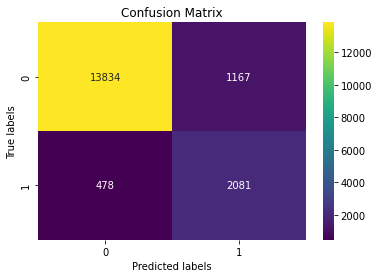

In [ ]:
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="viridis")
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix")
plt.show()

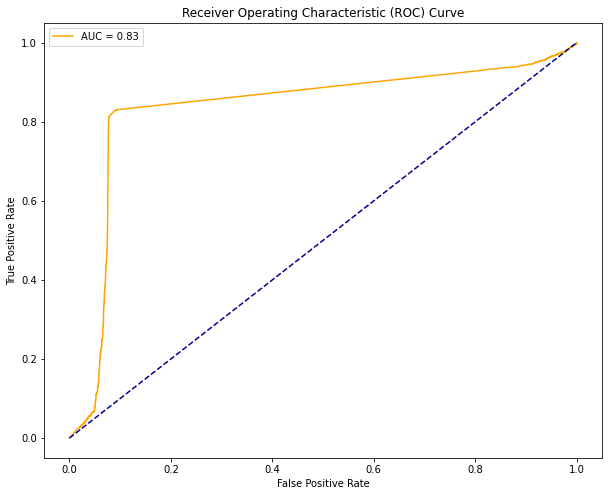

In [ ]:
from sklearn.metrics import roc_curve

# Assuming pred_p is a 2D array with probability predictions and we need the probabilities of the positive class
# Usually, the positive class is at index 1
pred_p_positive = pred_p[:, 1] if pred_p.ndim > 1 else pred_p

fpr, tpr, thresholds = roc_curve(y_test, pred_p_positive)
auc_score = roc_auc_score(y_test, pred_p_positive)
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color="orange", label=f"AUC = {auc_score:.2f}")
plt.plot([0, 1], [0, 1], color="darkblue", linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend()
plt.show()